In [11]:
import json
import pandas as pd
from glob import glob

def convert(x, skips):
    ''' Convert a json string to a flat python dictionary
    which can be passed into Pandas. '''
    ob = json.loads(x)
    
    for k, v in ob.items():
        if k not in skips:
            if isinstance(v, list):
                ob[k] = ','.join(v)
            elif isinstance(v, dict):
                for kk, vv in v.items():
                    ob['%s_%s' % (k, kk)] = vv
                del ob[k]
    return ob




for json_filename in glob('data/*.json'):
    csv_filename = '%s.csv' % json_filename[:-5]
    print 'Converting %s to %s' % (json_filename, csv_filename)
    df = pd.DataFrame([convert(line, ['elite']) for line in file(json_filename)])
    df.to_csv(csv_filename, encoding='utf-8', index=False)


Converting data\test.json to data\test.csv
Converting data\yelp_academic_dataset_business.json to data\yelp_academic_dataset_business.csv
Converting data\yelp_academic_dataset_checkin.json to data\yelp_academic_dataset_checkin.csv
Converting data\yelp_academic_dataset_review.json to data\yelp_academic_dataset_review.csv
Converting data\yelp_academic_dataset_tip.json to data\yelp_academic_dataset_tip.csv
Converting data\yelp_academic_dataset_user.json to data\yelp_academic_dataset_user.csv


In [3]:
cities = pd.read_csv("data/PEP_2015_PEPANNRSIP.US12A_with_ann.csv")[['GC_RANK.display-label','respop72015']]

cities['city'] = cities['GC_RANK.display-label'].apply(lambda x : x.split(',')[0].strip().replace("United States - ","").replace(" city",""))
cities['state'  ] = cities['GC_RANK.display-label'].apply(lambda x : x.split(',')[-1].strip())



cities = cities[['city','state','respop72015']]



In [8]:
businesses = pd.read_csv("data/yelp_academic_dataset_business.csv")

businesses = businesses[['name','review_count', 'stars', 'type','city','state','business_id']]

print businesses.head()
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'BC': 'British Columbia',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'ON': 'Ontario',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'QC': 'Quebec',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'}
stateNames = states.keys()
print businesses.shape
businesses = businesses[businesses['state'].isin(stateNames)]
print businesses.shape
businesses['state'  ] = businesses['state'].apply(lambda x : states[x])
print businesses.head()
list(businesses.columns)


                       name  review_count  stars      type         city state  \
0                 Mr Hoagie             4    4.5  business   Dravosburg    PA   
1              Clancy's Pub             4    3.5  business   Dravosburg    PA   
2          Joe Cislo's Auto             3    5.0  business   Dravosburg    PA   
3  Cool Springs Golf Center             5    2.5  business  Bethel Park    PA   
4                   Verizon             5    2.5  business   Pittsburgh    PA   

              business_id  
0  5UmKMjUEUNdYWqANhGckJw  
1  UsFtqoBl7naz8AVUBZMjQQ  
2  3eu6MEFlq2Dg7bQh8QbdOg  
3  cE27W9VPgO88Qxe4ol6y_g  
4  HZdLhv6COCleJMo7nPl-RA  
(77445, 7)
(73001, 7)
                       name  review_count  stars      type         city  \
0                 Mr Hoagie             4    4.5  business   Dravosburg   
1              Clancy's Pub             4    3.5  business   Dravosburg   
2          Joe Cislo's Auto             3    5.0  business   Dravosburg   
3  Cool Springs Golf Ce

['name', 'review_count', 'stars', 'type', 'city', 'state', 'business_id']

In [9]:
merged = pd.merge(businesses, cities, how='left', left_on=['city','state'], right_on=['city','state'], sort=True, copy=True, indicator=False)

In [10]:

print merged.head()
print merged.respop72015.value_counts()

                     name  review_count  stars      type            city  \
0   A B-Z Auto Care, Inc.            15    4.5  business  110. Las Vegas   
1               Hi-Health             4    2.5  business       Ahwatukee   
2          My Wine Cellar           131    4.0  business       Ahwatukee   
3  Florencia Pizza Bistro           111    4.5  business       Ahwatukee   
4        Hertz Rent A Car            17    2.0  business       Ahwatukee   

     state             business_id  respop72015  
0   Nevada  -ogzDp-rxTVSq3ecMohf1A          NaN  
1  Arizona  3f63xakGO8jjjvgkULKKqA          NaN  
2  Arizona  Our6bzte5W1wlIeOu9luug          NaN  
3  Arizona  dG7KLQ1a584wI5jSADIPIg          NaN  
4  Arizona  4-PHJ438SB3b1o_WE8rT7A          NaN  
623747.0     17422
1563025.0    10629
827097.0      5188
236839.0      5139
304391.0      3337
471825.0      3190
285667.0      2839
175826.0      2773
260828.0      2425
248951.0      2104
240126.0      1823
171237.0       929
234807.0       

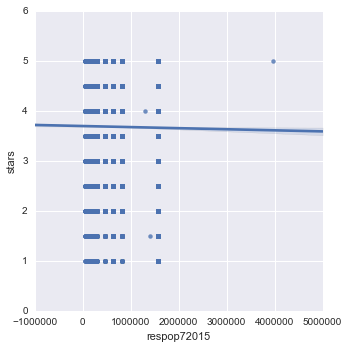

In [100]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.lmplot(x="respop72015", y="stars", data=merged);

In [14]:
reviews = pd.read_csv("data/yelp_academic_dataset_review.csv", nrows=2000)
print list(reviews.columns.values)



print reviews.head()


['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id', 'votes_cool', 'votes_funny', 'votes_useful']
              business_id        date               review_id  stars  \
0  5UmKMjUEUNdYWqANhGckJw  2012-08-01  Ya85v4eqdd6k9Od8HbQjyA      4   
1  5UmKMjUEUNdYWqANhGckJw  2014-02-13  KPvLNJ21_4wbYNctrOwWdQ      5   
2  5UmKMjUEUNdYWqANhGckJw  2015-10-31  fFSoGV46Yxuwbr3fHNuZig      5   
3  UsFtqoBl7naz8AVUBZMjQQ  2013-11-08  Di3exaUCFNw1V4kSNW5pgA      5   
4  UsFtqoBl7naz8AVUBZMjQQ  2014-03-29  0Lua2-PbqEQMjD9r89-asw      3   

                                                text    type  \
0  Mr Hoagie is an institution. Walking in, it do...  review   
1  Excellent food. Superb customer service. I mis...  review   
2  Yes this place is a little out dated and not o...  review   
3  All the food is great here. But the best thing...  review   
4  We checked this place out this past Monday for...  review   

                  user_id  votes_cool  votes_funny  votes_useful